# Lea's AI experiment

I'm a DOS enthusiast and created a pixel rasterfont editor, called [pixelfedit](https://github.com/learosema/pixelfedit). You can edit raster fonts in the sizes 8x8, 8x14 or 8x16. These were commonly used in the EGA and VGA text modes. VGA graphics cards had the possibility to replace the character symbols with your own definitions, so I made this editor. It was originally a Pascal program written in 1996, now ported to the web.

As it is sometimes a bit tedious to draw all the characters, especially the ones you don't need to often, I want to add GenAI to help me with the tedious work.

So, A thing I want to try is to create a generative AI for raster font generation.
Let the user draw a couple characters and then let the AI predict a whole rest of the DOS-style character set.

You can use Tensorflow Pix2Pix for that.

## Getting started

Let's see how this works.

First things first, let's print Hello World. I love starting like that:

In [1]:
print("Hello World!")


Hello World!


Yay, that worked! Now let's prepare our training data.

For that, I have pixeled a few rasterfonts. They are arranged in a 16x16 grid, with each character having a resolution of 8x8.
See smolserif-8x8, for example:

![smolserif character set, in Codepage 437](./charsets/smolserif-8x8.png)

Uh. This is a little small. Let's display it using mathplotlib :)


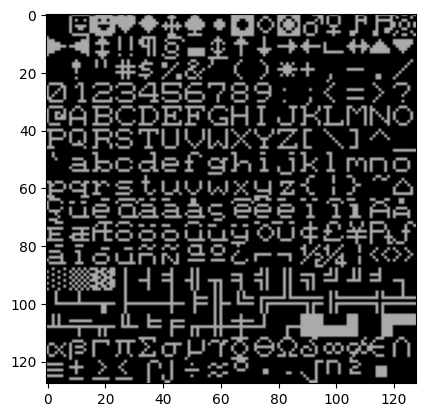

In [26]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('./charsets/smolserif-8x8.png').convert('F')
plt.imshow(img)

Ah, much better!

Next, let's prepare our training data. Pix2pix expects 512x256 pixel image with 2 square-shaped images.
The input image (A) on the left, the expected output on the right.
We use a little python program for that.

As we want to teach our model to complete a character set, we put the complete character set on the right side of the training image. On the left side, there's a heavily reduced set where only a few characters are defined.


In [4]:
from font_pairgen import process_all_fonts

process_all_fonts("charsets", "training_pairs", num_variants=5)

Processing boldie-8x8.png
Processing scifi-8x8.png
Processing smolserif-8x8.png


In [6]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display


Okay, that seems to work. Let's try to load some images that we will use as our training data.